<a href="https://colab.research.google.com/github/RomanKuliievych/datasience/blob/main/Pandas_realworld_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Get the data***

In [1]:
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git
!pip install -U kaleido

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 101 kB/s 


In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np

import os


# To visualise graphs in GitHub
pio.renderers.default = "svg"

In [3]:
files_dir = 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'
entries = os.listdir(files_dir)
list_of_sales_df = []

for entry in entries:
  print(entry)
  list_of_sales_df.append(pd.read_csv(files_dir + entry))

Sales_March_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_July_2019.csv
Sales_September_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv


In [4]:
data_df = pd.concat(list_of_sales_df, ignore_index=True)
data_df.to_csv('Sales_Year.csv', index=False)

In [5]:
data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# ***Cleaning and preprocessing the data***

In [7]:
data_df['Month'] = pd.to_numeric(data_df['Order Date'].apply(lambda x: str(x)[:2]), errors='coerce')

data_df['Quantity Ordered']  = pd.to_numeric(data_df['Quantity Ordered'], errors='coerce')
data_df['Price Each']  = pd.to_numeric(data_df['Price Each'], errors='coerce')
data_df['Purchase Address'] = data_df['Purchase Address'].astype(str)
data_df['Order Date'] = data_df['Order Date'].astype(str)
data_df.dropna(inplace=True)
data_df['Order Date'] = pd.to_datetime(data_df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 11.3+ MB


# ***Analysis***

### ***Revenue by month***

In [8]:
data_df['Receipts'] = data_df['Price Each'] * data_df['Quantity Ordered']
receipts_per_month = data_df.groupby('Month').sum()
receipts_per_month

,Quantity Ordered,Price Each,Receipts
Month,,,
1.0,10903.0,1811768.38,1822256.73
2.0,13449.0,2188884.72,2202022.42
3.0,17005.0,2791207.83,2807100.38
4.0,20558.0,3367671.02,3390670.24
5.0,18667.0,3135125.13,3152606.75
6.0,15253.0,2562025.61,2577802.26
7.0,16072.0,2632539.56,2647775.76
8.0,13448.0,2230345.42,2244467.88
9.0,13109.0,2084992.09,2097560.13


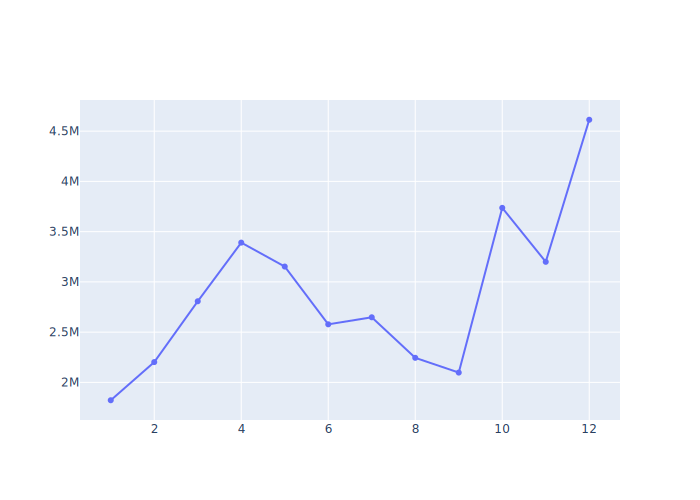

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 13)), y=receipts_per_month['Receipts']))

### ***Revenue by city***

In [10]:
data_df['City'] = data_df['Purchase Address'].apply(lambda x: ' '.join(x.split(', ')[1:]) if ', ' in x else np.NaN)
data_df['City']

0                Austin TX 73301
1                Austin TX 73301
2                Austin TX 73301
3         San Francisco CA 94016
4         San Francisco CA 94016
                   ...          
186845      Los Angeles CA 90001
186846           Austin TX 73301
186847           Boston MA 02215
186848           Boston MA 02215
186849           Boston MA 02215
Name: City, Length: 185950, dtype: object

In [11]:
receipts_per_city = data_df.groupby('City').sum()
receipts_per_city

,Quantity Ordered,Price Each,Month,Receipts
City,,,,
Atlanta GA 30301,16602.0,2779908.20,104794.0,2795498.58
Austin TX 73301,11153.0,1809873.61,69829.0,1819581.75
Boston MA 02215,22528.0,3637409.77,141112.0,3661642.01
Dallas TX 75001,16730.0,2752627.82,104620.0,2767975.40
Los Angeles CA 90001,33289.0,5421435.23,208325.0,5452570.80
New York City NY 10001,27932.0,4635370.83,175741.0,4664317.43
Portland ME 04101,2750.0,447189.25,17144.0,449758.27
Portland OR 97035,11303.0,1860558.22,70621.0,1870732.34
San Francisco CA 94016,50239.0,8211461.74,315520.0,8262203.91


In [12]:
receipts_per_city.index

Index(['Atlanta GA 30301', 'Austin TX 73301', 'Boston MA 02215',
       'Dallas TX 75001', 'Los Angeles CA 90001', 'New York City NY 10001',
       'Portland ME 04101', 'Portland OR 97035', 'San Francisco CA 94016',
       'Seattle WA 98101'],
      dtype='object', name='City')

In [13]:
receipts_per_city['Receipts']

City
Atlanta GA 30301          2795498.58
Austin TX 73301           1819581.75
Boston MA 02215           3661642.01
Dallas TX 75001           2767975.40
Los Angeles CA 90001      5452570.80
New York City NY 10001    4664317.43
Portland ME 04101          449758.27
Portland OR 97035         1870732.34
San Francisco CA 94016    8262203.91
Seattle WA 98101          2747755.48
Name: Receipts, dtype: float64

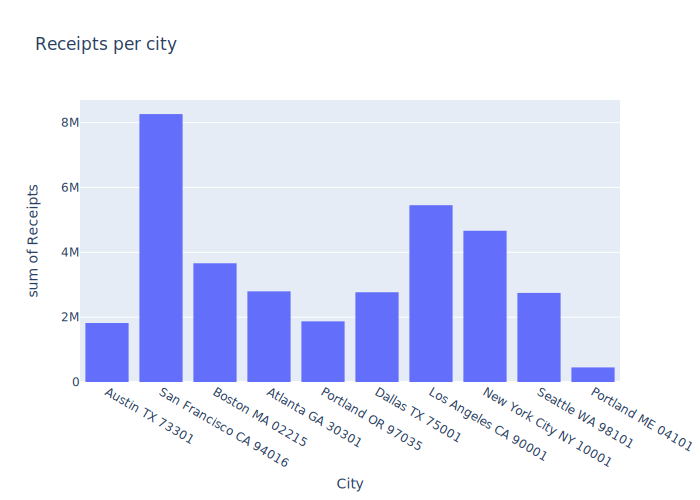

In [14]:
px.histogram(data_df, x="City", y="Receipts", title="Receipts per city")

### ***Revenue by hour***

In [15]:
data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Receipts,City
0,162009,iPhone,1.0,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3.0,700.00,Austin TX 73301
1,162009,Lightning Charging Cable,1.0,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3.0,14.95,Austin TX 73301
2,162009,Wired Headphones,2.0,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3.0,23.98,Austin TX 73301
3,162010,Bose SoundSport Headphones,1.0,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3.0,99.99,San Francisco CA 94016
4,162011,34in Ultrawide Monitor,1.0,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3.0,379.99,San Francisco CA 94016
...,...,...,...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2.0,2.99,2019-11-04 14:17:00,"574 4th St, Los Angeles, CA 90001",11.0,5.98,Los Angeles CA 90001
186846,295661,USB-C Charging Cable,1.0,11.95,2019-11-23 07:22:00,"359 1st St, Austin, TX 73301",11.0,11.95,Austin TX 73301
186847,295662,Lightning Charging Cable,1.0,14.95,2019-11-13 16:12:00,"900 10th St, Boston, MA 02215",11.0,14.95,Boston MA 02215
186848,295663,AAA Batteries (4-pack),1.0,2.99,2019-11-17 17:08:00,"592 Sunset St, Boston, MA 02215",11.0,2.99,Boston MA 02215


In [16]:
data_df['Order Hour'] = data_df['Order Date'].dt.hour

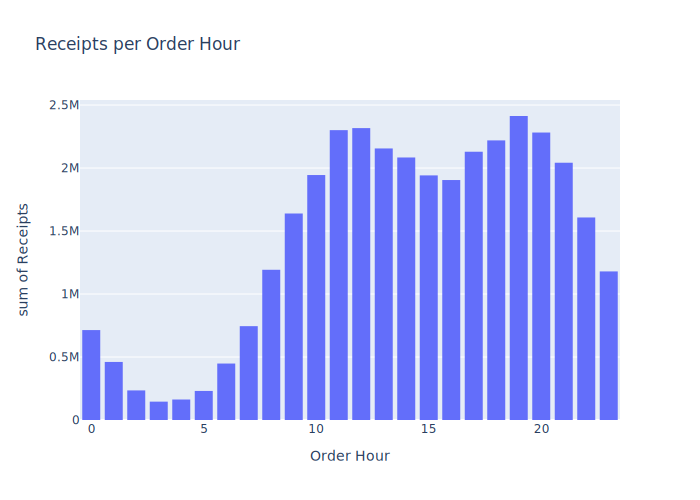

In [17]:
fig = px.histogram(data_df, x="Order Hour", y="Receipts", title="Receipts per Order Hour")
fig.update_layout(bargap=0.2)
fig.show()

### ***Products bought together***

In [18]:
data_df['Date/Address'] = data_df['Order Date'].astype(str) + ' / ' + data_df['Purchase Address']

In [19]:
products_bought_together = data_df[data_df.duplicated('Date/Address', keep=False)].groupby('Date/Address')['Product'].apply(lambda x: sorted(list(x))).reset_index()
products_bought_together

,Date/Address,Product
0,"2019-01-01 07:29:00 / 628 Lake St, New York Ci...","[Wired Headphones, iPhone]"
1,"2019-01-01 11:25:00 / 6 Johnson St, Atlanta, G...","[Google Phone, USB-C Charging Cable]"
2,"2019-01-01 12:02:00 / 761 Lakeview St, Dallas,...","[Lightning Charging Cable, iPhone]"
3,"2019-01-01 12:51:00 / 984 Lakeview St, San Fra...","[Google Phone, USB-C Charging Cable]"
4,"2019-01-01 12:57:00 / 229 Elm St, New York Cit...","[Google Phone, Wired Headphones]"
...,...,...
7131,"2019-12-31 20:51:00 / 774 Washington St, San F...","[20in Monitor, AAA Batteries (4-pack)]"
7132,"2019-12-31 22:04:00 / 138 Lincoln St, Los Ange...","[AAA Batteries (4-pack), Macbook Pro Laptop]"
7133,"2020-01-01 00:10:00 / 730 Pine St, San Francis...","[Apple Airpods Headphones, iPhone]"
7134,"2020-01-01 00:22:00 / 519 13th St, New York Ci...","[Lightning Charging Cable, iPhone]"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for product_list in products_bought_together['Product']:
  count.update(Counter(combinations(product_list, 2)))

count.most_common(20)

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129),
 (('Apple Airpods Headphones', 'Lightning Charging Cable'), 116),
 (('AA Batteries (4-pack)', 'Lightning Charging Cable'), 106),
 (('Bose SoundSport Headphones', 'USB-C Charging Cable'), 102),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 100),
 (('Apple Airpods Headphones', 'Wired Headphones'), 100),
 (('AAA Batteries (4-pack)', 'USB-C Charging Cable'), 95),
 (('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 87),
 (('AAA Batteries (4-pack)', 'Wired Headphones'), 86),
 (('AA Bat

### ***Most sold products***

In [21]:
quantity_per_product = data_df.groupby('Product')['Quantity Ordered'].sum().reset_index()
price_per_product = data_df[['Product', 'Price Each']].drop_duplicates()
res = pd.merge(price_per_product, quantity_per_product, on='Product')

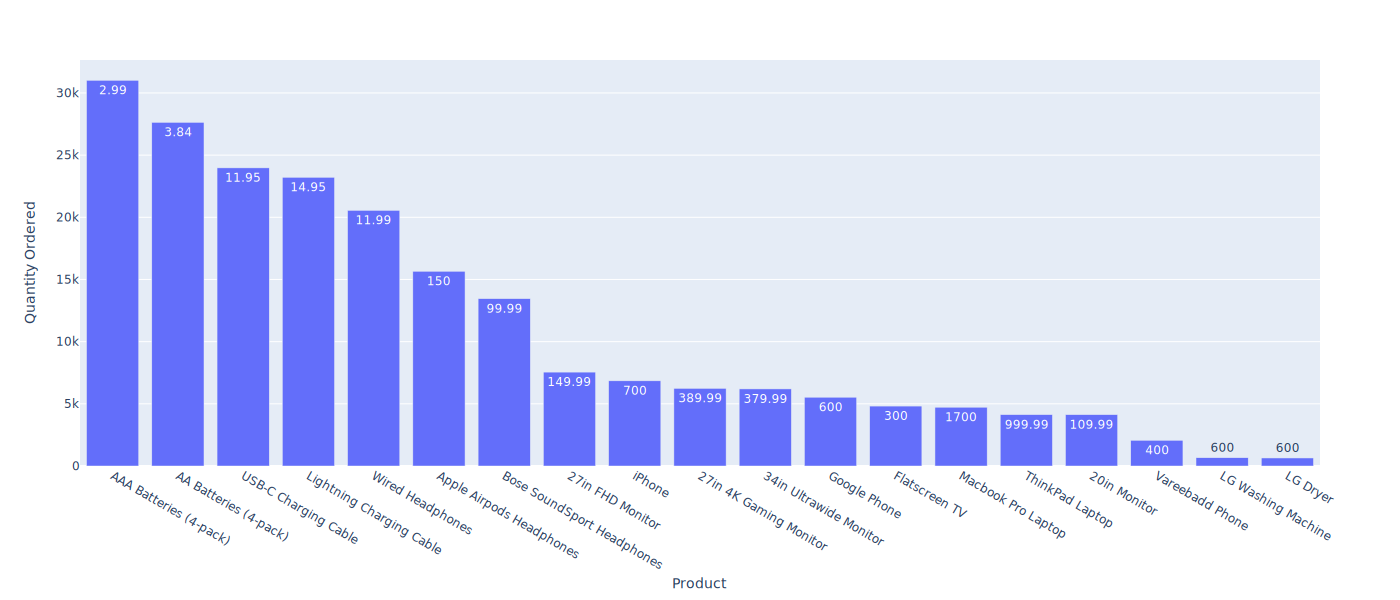

In [28]:
fig = px.bar(res, x='Product', y='Quantity Ordered', text='Price Each')
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    width=1400,
    height=600)
fig.show()